In [1]:
# Python Imports

# Custom Library Imports
# from util.load_data_by_os import DataManager

#External Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# datamanager = DataManager()

In [3]:
# Import ORD specific Data
ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")
# ord_df = datamanager.load_ord_by_os()

/tmp/ipykernel_54383/2935119021.py:2: DtypeWarning: Columns (12,14,87,94) have mixed types. Specify dtype option on import or set low_memory=False.
  ord_df = pd.read_csv("../data/ORD_11_21-11_22.csv")


In [4]:
# Columns with mixed type warning, lets investigate
ord_df.iloc[:, [12, 14, 87, 94]]

,Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Div2Airport,Div2TailNum
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
599720,NaN,NaN,NaN,NaN
599721,NaN,NaN,NaN,NaN
599722,NaN,NaN,NaN,NaN
599723,NaN,NaN,NaN,NaN


In [5]:
# None of these columns are needed, we can ignore and create our second subfile
include_lst = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate','Marketing_Airline_Network', 'Tail_Number', 'Flight_Number_Operating_Airline',
'Tail_Number', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay',
'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn',
'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
'LateAircraftDelay']

new_ord_df = ord_df[include_lst]

In [6]:
print(len(new_ord_df))
new_ord_df.head()

599725


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Tail_Number,Flight_Number_Operating_Airline,Tail_Number,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2021,4,11,17,3,2021-11-17,UA,N442AW,3727,N442AW,...,110.0,72.0,1.0,536.0,3,NaN,NaN,NaN,NaN,NaN
1,2021,4,11,17,3,2021-11-17,UA,N423AW,3726,N423AW,...,138.0,89.0,1.0,473.0,2,1.0,0.0,11.0,0.0,18.0
2,2021,4,11,17,3,2021-11-17,UA,N438AW,3725,N438AW,...,64.0,29.0,1.0,67.0,1,NaN,NaN,NaN,NaN,NaN
3,2021,4,11,17,3,2021-11-17,UA,N433AW,3723,N433AW,...,163.0,124.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN
4,2021,4,11,17,3,2021-11-17,UA,N433AW,3722,N433AW,...,146.0,120.0,1.0,794.0,4,NaN,NaN,NaN,NaN,NaN


In [7]:
new_ord_df.to_csv('../data/ORD_11_21-11-22_short.csv')

In [8]:
ord_df = new_ord_df

def lst_na_cols():
    na_col_lst = []
    no_na_lst = []
    for i in ord_df.columns:
        if ord_df[i].isna().values.any():
            na_col_lst.append(i)
        else:
            no_na_lst.append(i)
    assert len(ord_df.columns) == (len(na_col_lst) + len(no_na_lst))

    print("NA exists in:", na_col_lst)
    print("There are no NAs in :", no_na_lst)

lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup']


In [9]:
# Before dealing with NA we should fill the NAs that should be zero
# These are delay times for sure
ord_df['CarrierDelay'] = ord_df['CarrierDelay'].fillna(0)
ord_df['WeatherDelay'] = ord_df['WeatherDelay'].fillna(0)
ord_df['NASDelay'] = ord_df['NASDelay'].fillna(0)
ord_df['SecurityDelay'] = ord_df['SecurityDelay'].fillna(0)

In [10]:
lst_na_cols()

NA exists in: ['Tail_Number', 'Tail_Number', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CancellationCode', 'ActualElapsedTime', 'AirTime', 'LateAircraftDelay']
There are no NAs in : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Flight_Number_Operating_Airline', 'Origin', 'Dest', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']


In [11]:
pre_ord_df_len = len(ord_df)
ord_df = ord_df.dropna(subset=['ArrDelayMinutes', 'ArrDelay'])
print(f"Dropped {pre_ord_df_len - len(ord_df)} data points")

Dropped 17004 data points


## Exploring

Let's explore some basic data on important points and make basic figures

In [12]:
ord_delay_mean = ord_df['ArrDelay'].mean()
ord_delay_median = ord_df['ArrDelay'].median()

print("ORD All flights Delay Mean:", ord_delay_mean)
print("ORD All flights Delay Median:", ord_delay_median)

ORD All flights Delay Mean: 4.1678178751066115
ORD All flights Delay Median: -8.0


In [13]:
ord_delays_df = ord_df['ArrDelay'] >= 15
ord_delays_df = ord_df[ord_delays_df]
ord_delay_mean = ord_delays_df['ArrDelay'].mean()
ord_delay_median = ord_delays_df['ArrDelay'].median()

print("ORD Delay Mean:", ord_delay_mean)
print("ORD Delay Median:", ord_delay_median)

ORD Delay Mean: 73.27490338096442
ORD Delay Median: 42.0


In [14]:
flights_num = ord_df['ArrDelay'].count()
delays_num = ord_delays_df['ArrDelay'].count()
print("Amount of Flights:", flights_num)
print("Amount of Delays:", delays_num)
print("Precentage of Delayed Flights:", (delays_num/flights_num))

Amount of Flights: 582721
Amount of Delays: 106863
Precentage of Delayed Flights: 0.183386217417941


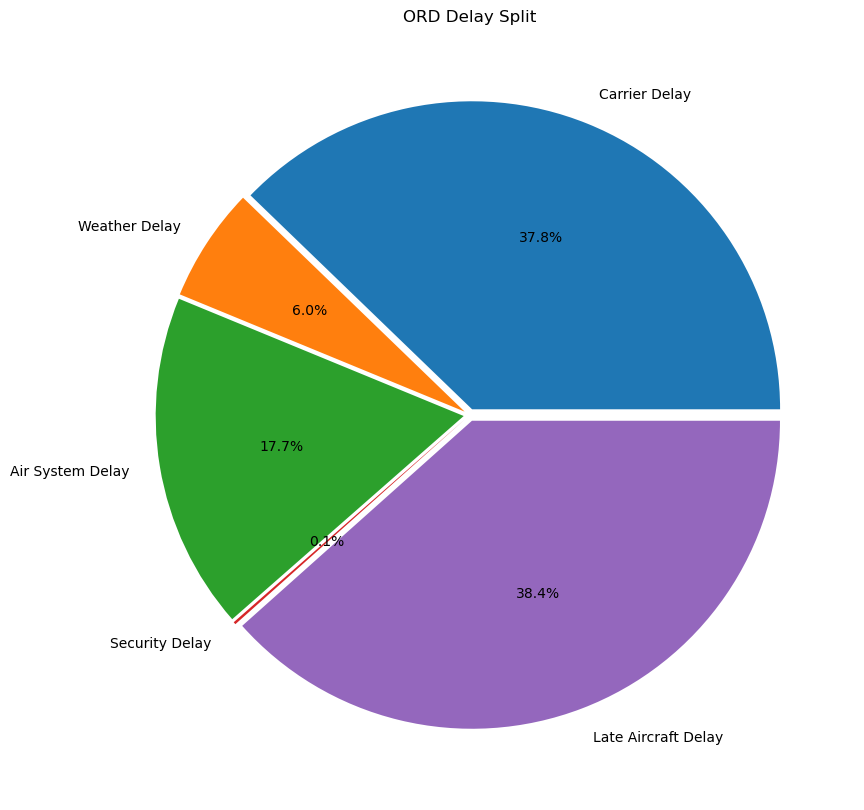

In [15]:
pie_chart_lst = [ord_df['CarrierDelay'].sum(), ord_df['WeatherDelay'].sum(),
 ord_df['NASDelay'].sum(), ord_df['SecurityDelay'].sum(), ord_df['LateAircraftDelay'].sum()]

pie_chart_labels_lst = ["Carrier Delay", 'Weather Delay', 'Air System Delay',
 'Security Delay', 'Late Aircraft Delay']

fig, ax1 = plt.subplots(1,1, figsize=(14,10))
ax1.pie(pie_chart_lst, labels=pie_chart_labels_lst, autopct='%1.1f%%', explode=(.02, .02, .02, .02, .02));
ax1.set_title("ORD Delay Split");

In [16]:
ord_delay_types_df = ord_delays_df[['Month','CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']]

# fig, ax1 = plt.subplots(1,1, figsize=(14,10))
# ord_delay_types_df.plot(x='Month', kind='bar', stacked=True)
# ord_delay_types_df.plot(kind='bar', stacked=True)